In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor


In [5]:
gold_dataset = pd.read_csv('gld_price_data.csv')

In [6]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
gold_dataset.shape

(2290, 6)

In [10]:
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [12]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [14]:
gold_dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [20]:
correlation = gold_dataset.corr()

<AxesSubplot:>

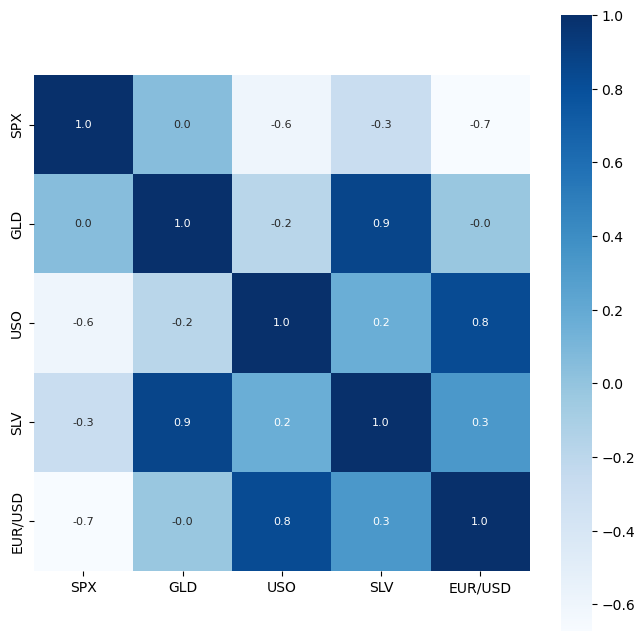

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation , cbar = True , square = True , fmt = '.1f' , annot = True , annot_kws = {'size' :8} , cmap = 'Blues')

In [24]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

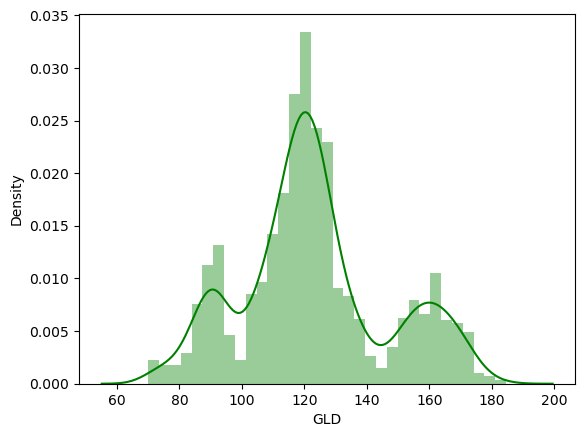

In [25]:
sns.distplot(gold_dataset['GLD'] , color = 'green')

In [26]:
X= gold_dataset.drop(['Date' , 'GLD'] , axis=1)
Y = gold_dataset['GLD']

In [27]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [28]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = .2 , random_state = 2)

In [31]:
regressor = RandomForestRegressor(n_estimators= 100)

In [32]:
regressor.fit(X_train , Y_train)

RandomForestRegressor()

In [37]:
test_prediction = regressor.predict(X_test)

train_prediction = regressor.predict(X_train)

In [38]:
print(test_prediction)

print(train_prediction)

[168.59879932  82.15249977 115.80970003 127.72960073 120.83620139
 154.64879804 150.38649819 125.99120076 117.45849864 125.8780009
 116.6094015  171.87520109 141.69789935 167.4963983  115.17760016
 117.40450057 140.18070298 170.30350074 159.88590352 161.62269923
 155.13870052 125.00960046 176.08399988 156.7969022  125.16410046
  93.75909983  77.53660029 120.69280011 119.02649923 167.48109989
  88.22940059 125.47020032  91.10770059 117.66350037 121.11049916
 136.18070085 115.52100163 115.17340071 149.35379945 106.89760137
 104.52140263  87.26319773 126.43340026 117.87169984 153.14039919
 119.65240009 108.30629974 108.02349861  93.14260049 127.02509788
  75.07400029 113.69369924 121.5377002  111.29039897 118.94349926
 120.7527997  158.44609979 167.50180161 146.97109677  85.96749888
  94.3575003   86.81679868  90.44870005 119.04240074 126.41300039
 127.53780021 169.78809949 122.18669929 117.49379896  98.3299002
 168.15830148 143.30539845 131.93170333 121.07770232 121.27379918
 119.6460006

In [40]:
score1 = metrics.r2_score(test_prediction , Y_test)

score2 = metrics.r2_score(train_prediction , Y_train)

print('R squared error for train prediction is : ' , score2)

print('R squared error for test prediction is : ' , score1)



R squared error for train prediction is :  0.9984053756234134
R squared error for test prediction is :  0.9893593871786853


In [48]:
Y_test = list(Y_test)

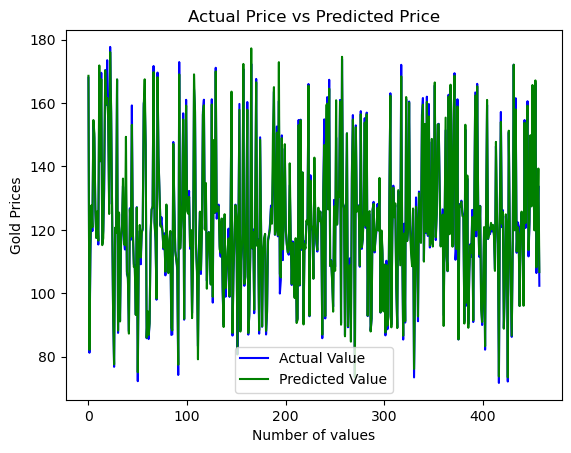

In [46]:
plt.plot(Y_test , color = 'blue' , label = 'Actual Value')
plt.plot(test_prediction , color= 'green' , label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price' )
plt.xlabel('Number of values')
plt.ylabel('Gold Prices')
plt.legend()
plt.show()

In [49]:
import joblib as jb

jb.dump(regressor , 'GoldPricePrediction.joblib')

['GoldPricePrediction.joblib']